AB testing template

In [2]:
import pandas as pd
import numpy as np

# Define the number of data points
num_data_points = 100

# Define the website versions
versions = ['A', 'B']

# Generate random revenue values for each version
revenue_a = np.random.randint(100, 1000, num_data_points)
revenue_b = np.random.randint(100, 1000, num_data_points)

# Create a DataFrame with the data
data = pd.DataFrame({'version': np.repeat(versions, num_data_points),
                     'revenue': np.concatenate([revenue_a, revenue_b])})

# Save the DataFrame to a CSV file
data.to_csv('mock_data_for_ABTest.csv', index=False)

In [3]:
data.head()

,version,revenue
0,A,978
1,A,363
2,A,909
3,A,371
4,A,966


In [5]:
import pandas as pd

import scipy.stats as stats

# Read the CSV file
data = pd.read_csv('mock_data_for_ABTest.csv')

# Split the data into two groups based on website version
group_a = data[data['version'] == 'A']['revenue']
group_b = data[data['version'] == 'B']['revenue']

# Perform AB testing using t-test
t_statistic, p_value = stats.ttest_ind(group_a, group_b)

# Print the results
confidence_level = 0.95

# Calculate the confidence intervals for group A
ci_a = stats.t.interval(confidence_level, len(group_a)-1, loc=group_a.mean(), scale=stats.sem(group_a))

# Calculate the confidence intervals for group B
ci_b = stats.t.interval(confidence_level, len(group_b)-1, loc=group_b.mean(), scale=stats.sem(group_b))

# Print the confidence intervals
print('Confidence Intervals for Group A:', ci_a)
print('Confidence Intervals for Group B:', ci_b)
print('P-Value:', p_value)

Confidence Intervals for Group A: (530.1462764018513, 633.8737235981487)
Confidence Intervals for Group B: (503.19069201546523, 607.8893079845348)
P-Value: 0.476845539116842


Test on percent lift

In [9]:

import pandas as pd
import numpy as np
import datetime

# Define the number of data points
num_data_points = 30

# Define the website versions
versions = ['A', 'B']

# Generate random revenue values for each version
revenue_a = np.random.randint(100, 1000, num_data_points)
revenue_b = np.random.randint(100, 1000, num_data_points)

# Generate random dates
start_date = datetime.date(2022, 1, 1)
dates = [start_date + datetime.timedelta(days=i) for i in range(num_data_points)]

# Calculate daily revenue per user for each version
daily_revenue_a = revenue_a / num_data_points
daily_revenue_b = revenue_b / num_data_points

# Calculate percentage lift from version A to version B
percentage_lift = ((daily_revenue_b - daily_revenue_a) / daily_revenue_a) * 100

# Create a DataFrame with the data
data = pd.DataFrame({'date': dates,
                     'daily_revenue_A': daily_revenue_a,
                     'daily_revenue_B': daily_revenue_b,
                     'percentage_lift': percentage_lift})



          date  daily_revenue_A  daily_revenue_B  percentage_lift
0   2022-01-01        10.200000        12.200000        19.607843
1   2022-01-02        11.566667         8.266667       -28.530259
2   2022-01-03        16.466667        14.933333        -9.311741
3   2022-01-04         6.633333         3.800000       -42.713568
4   2022-01-05        11.133333        15.266667        37.125749
5   2022-01-06        13.866667        21.666667        56.250000
6   2022-01-07         5.266667        18.933333       259.493671
7   2022-01-08        25.233333        20.466667       -18.890357
8   2022-01-09        22.966667         9.700000       -57.764877
9   2022-01-10        23.200000         8.100000       -65.086207
10  2022-01-11        30.733333         8.800000       -71.366594
11  2022-01-12        26.233333         4.933333       -81.194409
12  2022-01-13        22.400000         4.666667       -79.166667
13  2022-01-14         7.300000        28.900000       295.890411
14  2022-0

In [10]:
from scipy.stats import ttest_1samp

# Define the null hypothesis (H0) value
null_hypothesis = 0

# Perform the one-sample t-test
t_statistic, p_value = ttest_1samp(percentage_lift, null_hypothesis)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Fail to reject the null hypothesis


In [12]:
import scipy.stats as stats

# Define the confidence level
confidence_level = 0.95

# Calculate the standard error of the lift
lift_std_error = data['percentage_lift'].std() / np.sqrt(len(data))

# Calculate the margin of error
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, len(data)-1) * lift_std_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = data['percentage_lift'].mean() - margin_of_error
upper_bound = data['percentage_lift'].mean() + margin_of_error

# Print the confidence interval
print('Confidence Interval on the Lift:', (lower_bound, upper_bound))

Confidence Interval on the Lift: (-25.528032440002757, 56.052253169822066)


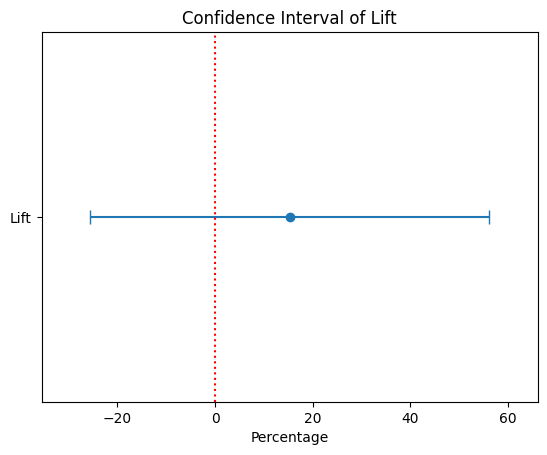

In [16]:
import matplotlib.pyplot as plt

# Plot the confidence interval in horizontal format
plt.errorbar([data['percentage_lift'].mean()], ['Lift'], xerr=margin_of_error, fmt='o', capsize=5)

# Set the x-axis limits
plt.xlim(lower_bound - 10, upper_bound + 10)

# Set the plot title and labels
plt.title('Confidence Interval of Lift')
plt.xlabel('Percentage')
plt.axvline(x=0, linestyle='dotted', color='red')

# Display the plot
plt.show()